In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/shahs/Desktop/bhavik project/creditcard.csv")

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().values.any()

False

In [15]:
data.duplicated().sum()

1081

In [17]:
data =data.drop_duplicates()

In [18]:
import pandas as pd

def get_imbalance_degree(target):
   
    minority_proportion = target.value_counts().min() / len(target)

    # Determine the degree of imbalance
    if minority_proportion >= 0.2 and minority_proportion <= 0.4:
        return "Mild Imbalance"
    elif minority_proportion > 0.01 and minority_proportion < 0.2:
        return "Moderate Imbalance"
    elif minority_proportion < 0.01:
        return "Extreme Imbalance"
    else:
        return "Balanced Dataset"


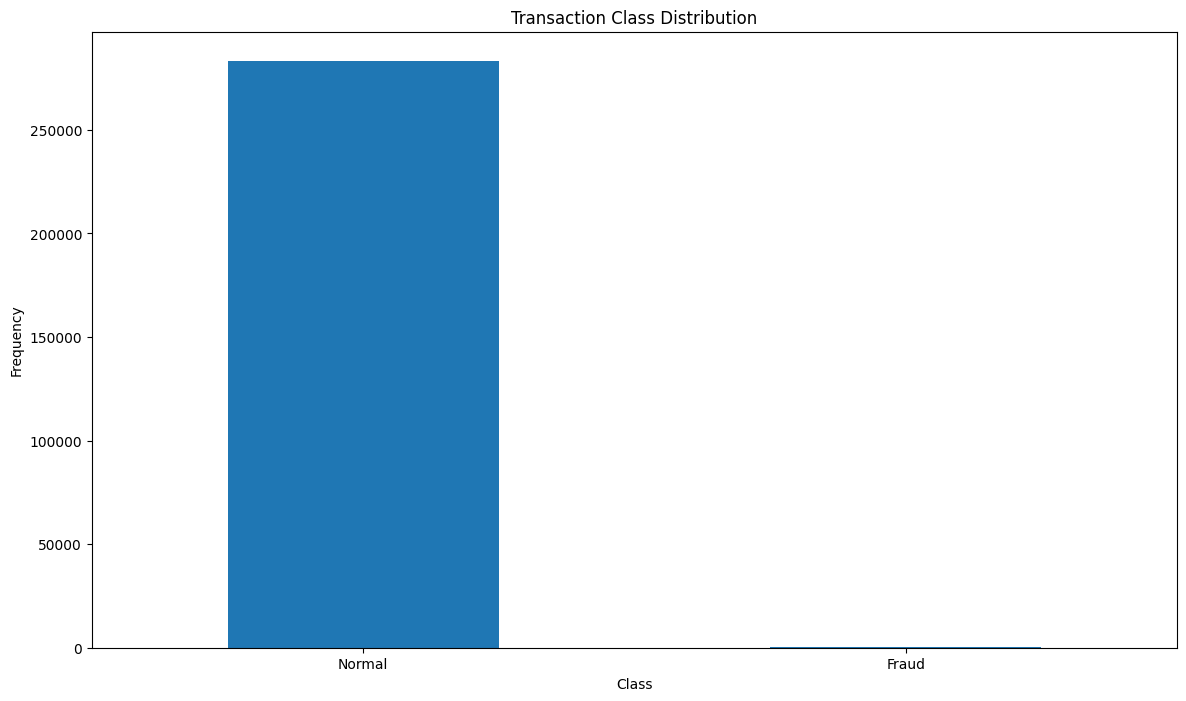

Degree of Imbalance: Extreme Imbalance


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' and a list named 'LABELS'
count_classes = pd.Series(data['Class']).value_counts()

count_classes.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.show()

# Example usage:
imbalance_degree = get_imbalance_degree(data['Class'])
print(f"Degree of Imbalance: {imbalance_degree}")


In [26]:
data['Class'].value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

In [28]:
X = data.drop(labels='Class', axis=1)
y= data.loc[:,'Class']

In [21]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [22]:
print(fraud.shape,normal.shape)

(473, 31) (283253, 31)


In [23]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

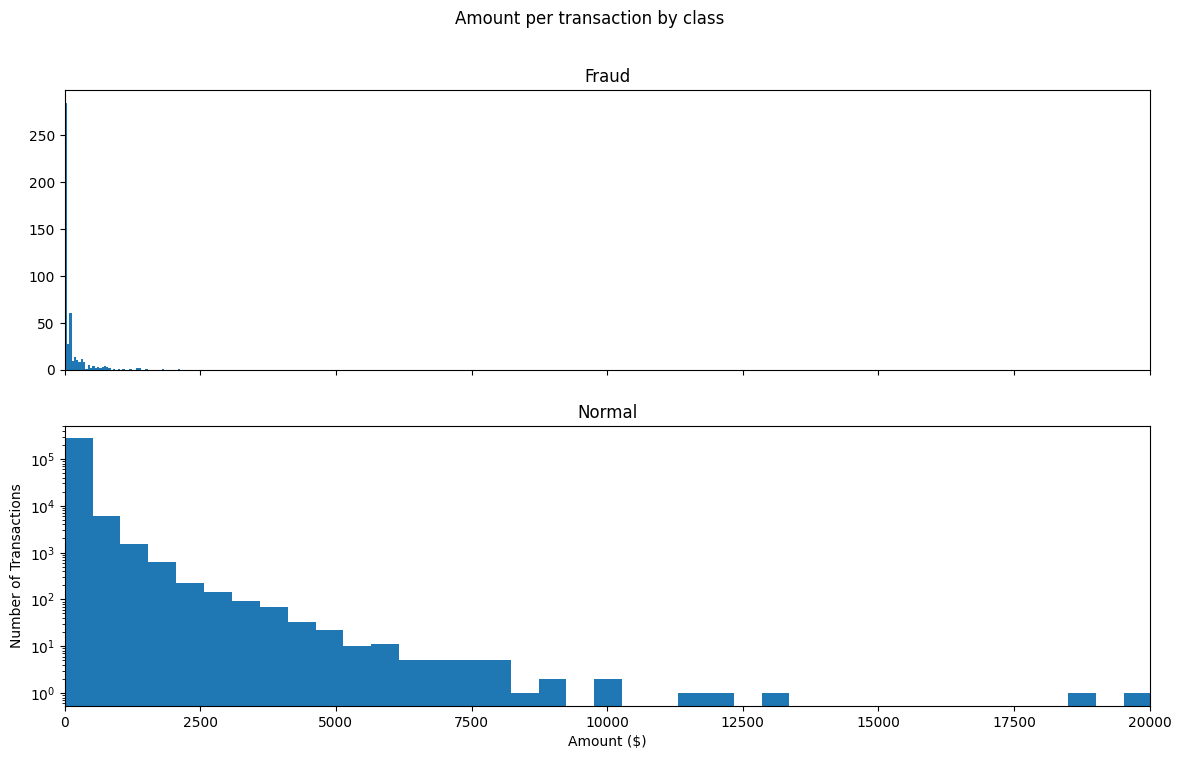

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

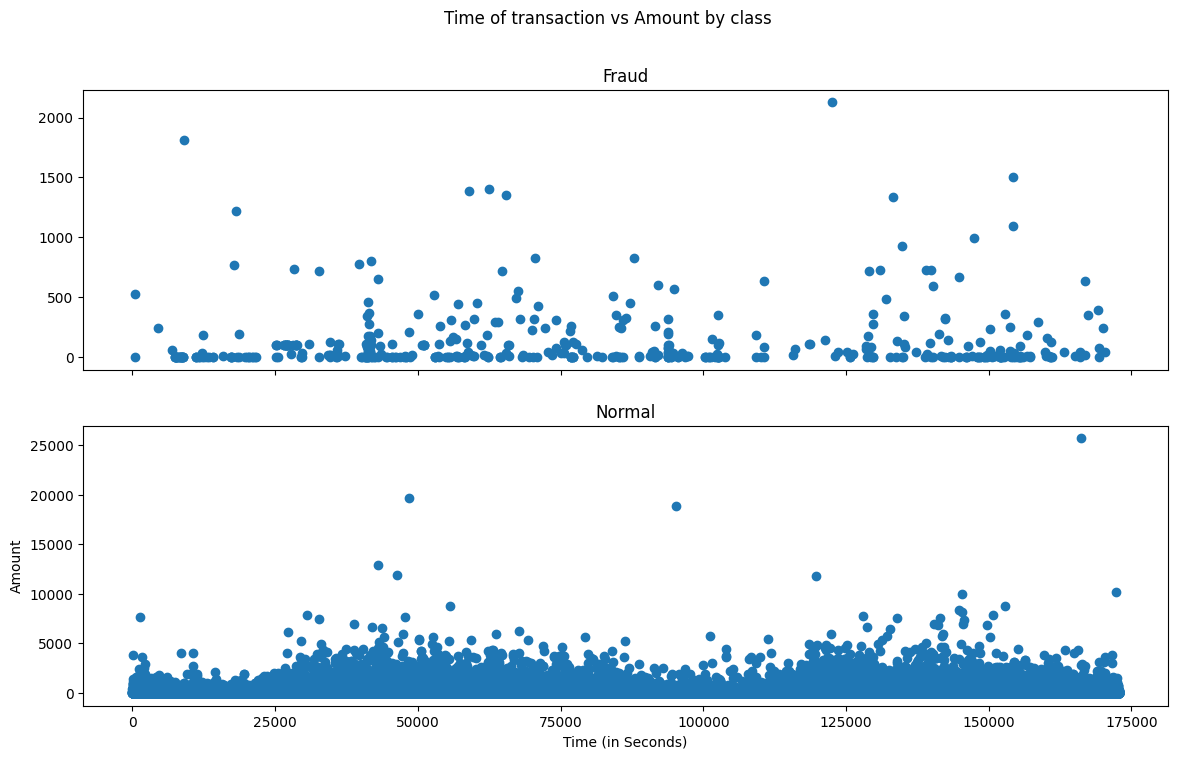

In [29]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [30]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28373, 31)

In [31]:
data.shape

(283726, 31)

In [32]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [33]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.001411781315074295
Fraud Cases : 40
Valid Cases : 28333


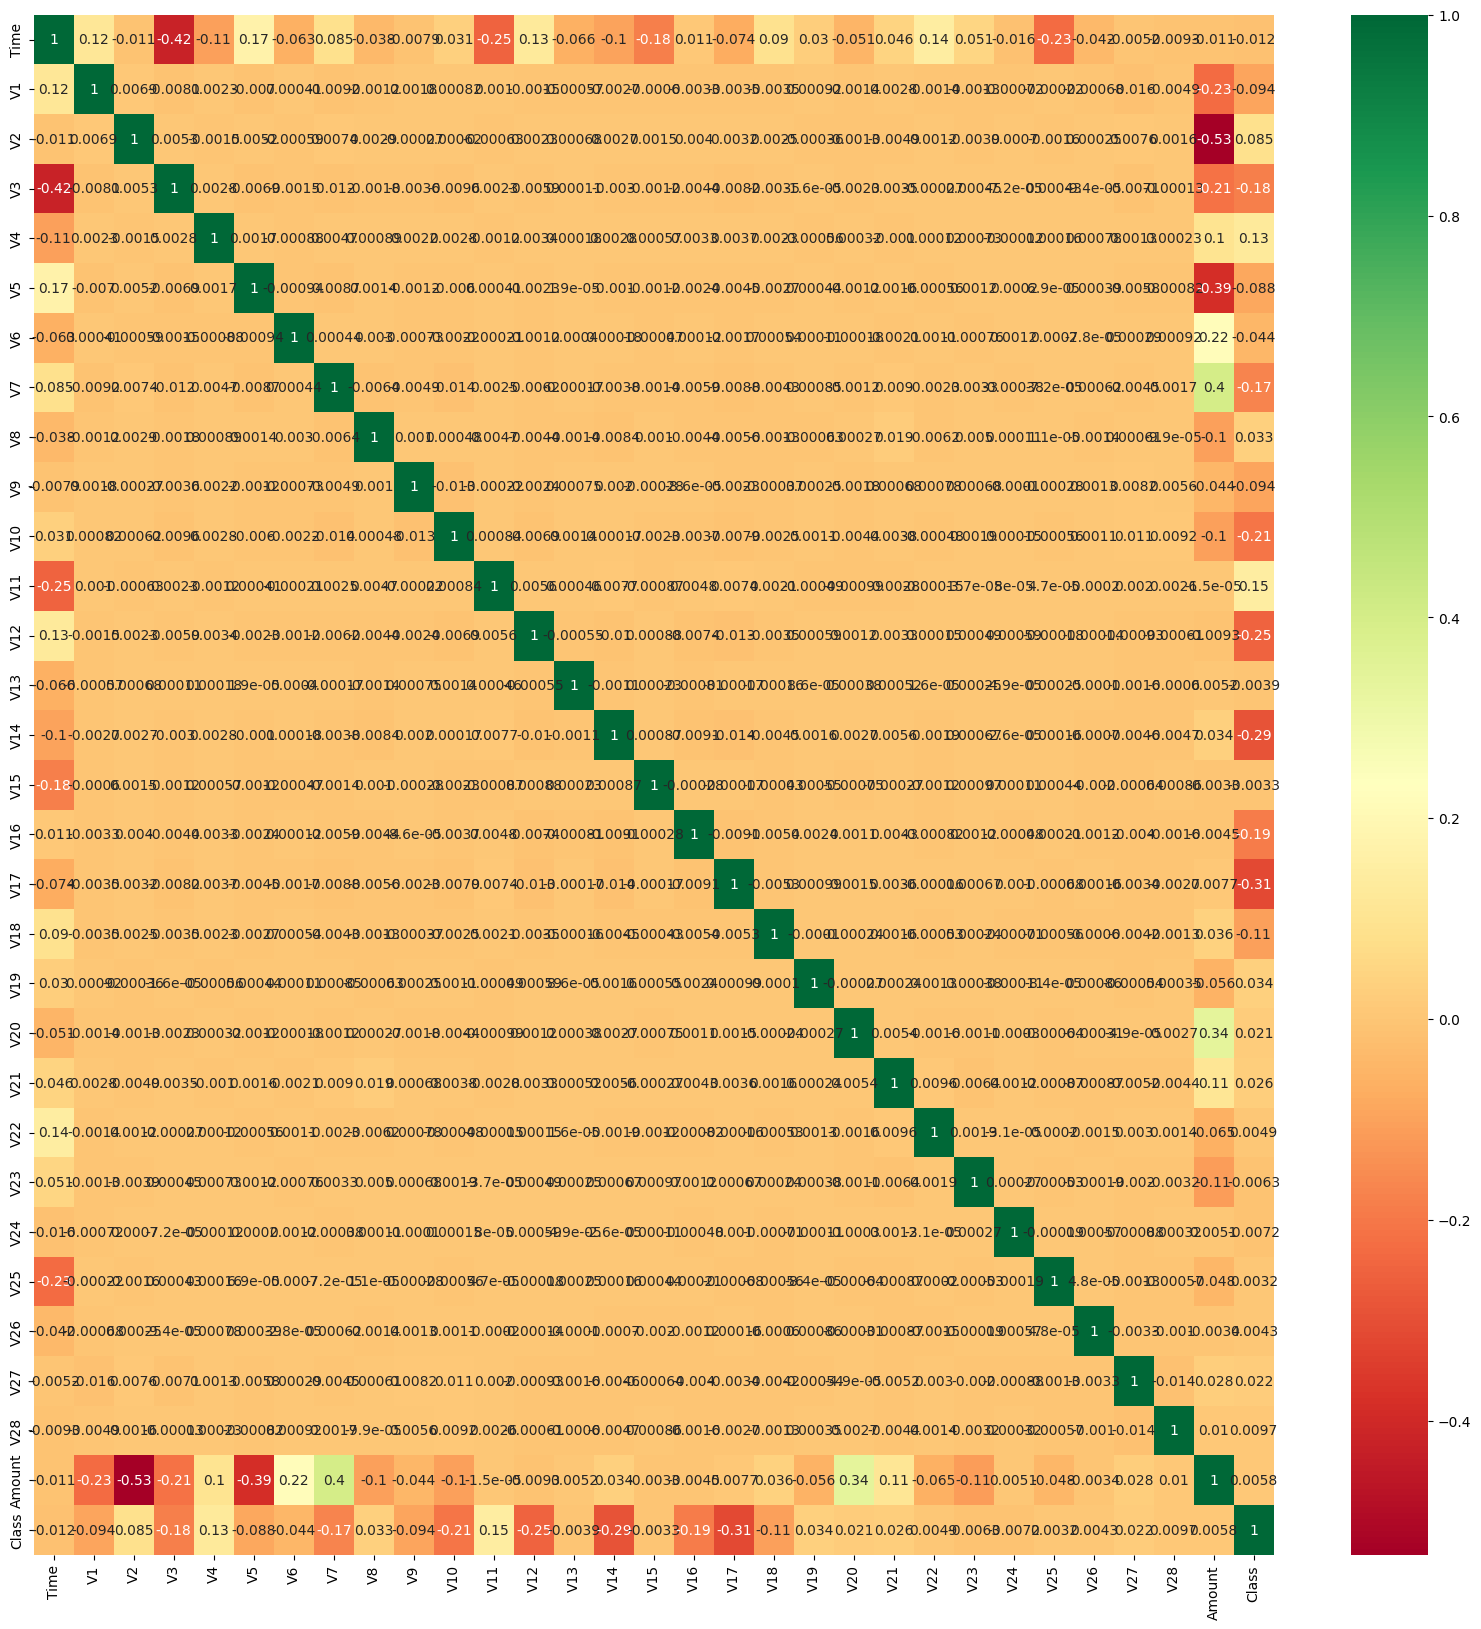

In [34]:
#Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

C:\Users\shahs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\shahs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


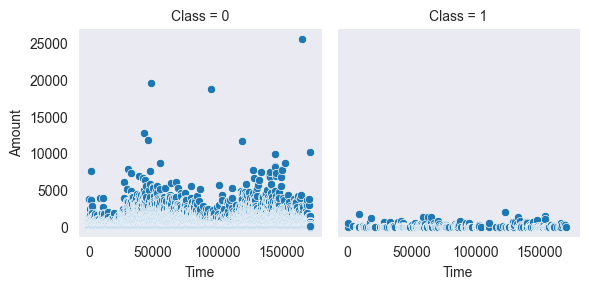

In [37]:
# Visually inspecting the impact of Amount over frauds
sns.set_style(style='dark')
sns.FacetGrid(data=data, col='Class').map(sns.scatterplot, 'Time', 'Amount', palette='muted')

In [35]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28373, 30)
(28373,)
